![IKhair APP ](r'C:\Users\HP\OneDrive\Desktop\6Pwv52rW_400x400.jpg')

### Important Libraries & Load Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

#### Data Exploration 

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\appgain.csv")

data = pd.read_csv(r"C:\Users\HP\Downloads\UsersTransactions_202406231512.csv")

df = pd.merge(df,data,left_on = 'id', right_on='userid')

df.sample(3)

,id_x,usagecounter,appver,datecreated,id_y,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator
57935,10576843,121,4.9.1,2020-08-31 02:40:39,9152759,10576843,None,IHSAN_AE,10,AE,SMS,2024-03-22 14:16:47,2215,13 year old child,إتصالات
36464,123474386,64078,68,2022-05-16 20:54:58,1586661,123474386,NaN,SHJC_AE,10,AE,SMS,2023-04-13 00:36:25,6210,other,None
17986,123484277,1,0.0.0,2023-08-28 11:10:28,9142292,123484277,SadakaGriha,IHSAN_AE,10,AE,SMS,2024-01-30 03:47:42,2215,مشروع الصدقة الجارية,إتصالات


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80662 entries, 0 to 80661
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_x          80662 non-null  int64 
 1   usagecounter  80662 non-null  int64 
 2   appver        80662 non-null  object
 3   datecreated   80662 non-null  object
 4   id_y          80662 non-null  int64 
 5   userid        80662 non-null  int64 
 6   actid         63081 non-null  object
 7   orgid         79923 non-null  object
 8   amount        80662 non-null  int64 
 9   countryid     80662 non-null  object
 10  method        80662 non-null  object
 11  date          80662 non-null  object
 12  shortCode     80661 non-null  object
 13  projcetName   80659 non-null  object
 14  operator      80662 non-null  object
dtypes: int64(5), object(10)
memory usage: 9.8+ MB


In [4]:
df.describe().round(2)

,id_x,usagecounter,id_y,userid,amount
count,8.066200e+04,80662.00,80662.00,8.066200e+04,80662.00
mean,8.497678e+07,37646.58,8275858.53,8.497678e+07,31.83
std,5.563424e+07,224415.85,2416494.14,5.563424e+07,91.54
min,1.032614e+06,0.00,1213989.00,1.032614e+06,0.00
25%,1.057054e+07,22.00,9109138.25,1.057054e+07,10.00
50%,1.234716e+08,123.00,9132989.50,1.234716e+08,10.00
75%,1.234840e+08,746.00,9154485.75,1.234840e+08,15.00
max,1.234905e+08,2622432.00,9176027.00,1.234905e+08,1000.00


#### Data Cleaning

In [5]:
df.isna().sum()

id_x                0
usagecounter        0
appver              0
datecreated         0
id_y                0
userid              0
actid           17581
orgid             739
amount              0
countryid           0
method              0
date                0
shortCode           1
projcetName         3
operator            0
dtype: int64

In [6]:
df.columns

Index(['id_x', 'usagecounter', 'appver', 'datecreated', 'id_y', 'userid',
       'actid', 'orgid', 'amount', 'countryid', 'method', 'date', 'shortCode',
       'projcetName', 'operator'],
      dtype='object')

### Drop Nulls and replace :

##### 1 : Categorical Value = Mode 
##### 2 : Numerical Value = Median 

In [7]:
# Userid 
df['actid'] = df['actid'].fillna(df['actid'].mode().iloc[0])

# orgid 
df['orgid'] = df['orgid'].fillna(df['orgid'].mode().iloc[0])

# ProjectName 
df['projcetName'] = df['projcetName'].fillna(df['projcetName'].mode().iloc[0])

In [8]:
df.isna().sum()

id_x            0
usagecounter    0
appver          0
datecreated     0
id_y            0
userid          0
actid           0
orgid           0
amount          0
countryid       0
method          0
date            0
shortCode       1
projcetName     0
operator        0
dtype: int64

In [9]:
AVG = df['amount'].mean().round(1)
print("Average =", AVG)

Average = 31.8


In [10]:
df.sample(1)

,id_x,usagecounter,appver,datecreated,id_y,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator
11874,123485579,5,0.0.0,2023-10-31 23:17:17,9157329,123485579,tafregKorab,IHSAN_AE,10,AE,SMS,2024-04-03 00:51:44,2215,A head of the family in crisis,إتصالات


#### Convert column (Date_Time) to Column (Date) and Column (Time) 

In [12]:
df['Date'] = pd.to_datetime(df['date']).dt.date

df['Time'] = pd.to_datetime(df['date']).dt.time

In [13]:
df.sample(1)

,id_x,usagecounter,appver,datecreated,id_y,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator,Date,Time
65248,1055531,274,4.9.1,2019-12-28 09:28:58,9101488,1055531,Quran,AWQAFSH_AE,10,AE,SMS,2023-06-23 03:58:34,2113,وقف القرآن الكريم,None,2023-06-23,03:58:34


#### Convert column (Date) to column (Day) , column (Day_name) , column (Month) , column (Month_name) & column (Year) by using Pandas library

In [14]:
df['Day'] = pd.to_datetime(df['date']).dt.day

df['Day_name'] = pd.to_datetime(df['date']).dt.day_name()

df['Month'] = pd.to_datetime(df['date']).dt.month

df['Month_name'] = pd.to_datetime(df['date']).dt.month_name()

df['Year'] = pd.to_datetime(df['date']).dt.year

#### Delete Old column (Date)

In [15]:
df = df.drop(['date'],axis=1)
df.head(3)

,id_x,usagecounter,appver,datecreated,id_y,userid,actid,orgid,amount,countryid,...,shortCode,projcetName,operator,Date,Time,Day,Day_name,Month,Month_name,Year
0,123490510,0,0.0.0,2024-06-23 12:26:17,9175999,123490510,KafartYmen,IHSAN_AE,100,AE,...,4944,كفارة يمين,إتصالات,2024-06-23,08:27:05,23,Sunday,6,June,2024
1,123490510,0,0.0.0,2024-06-23 12:26:17,9176001,123490510,KafartYmen,IHSAN_AE,50,AE,...,6226,كفارة يمين,إتصالات,2024-06-23,08:38:03,23,Sunday,6,June,2024
2,123490507,1,0.0.0,2024-06-23 10:39:19,9175971,123490507,3elag,HAI_AE,10,AE,...,2610,A woman with cancer,إتصالات,2024-06-23,06:39:51,23,Sunday,6,June,2024


#### Top 4 Date With Donation Amount

In [16]:
usagecounter = df.groupby('Date').max()['amount'].nlargest(4)
print(usagecounter)

Date
2021-12-12    1000
2022-05-01    1000
2022-08-15    1000
2022-08-25    1000
Name: amount, dtype: int64


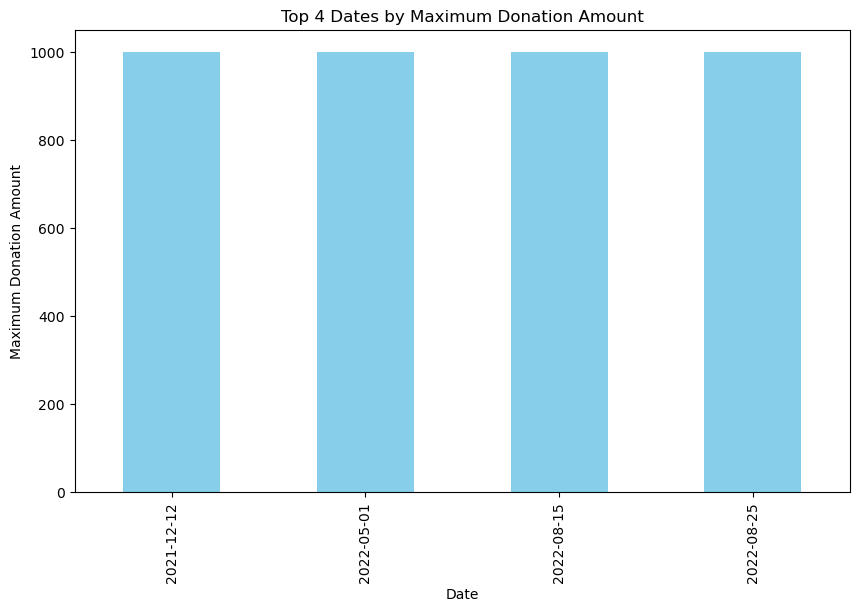

In [17]:
usagecounter.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top 4 Dates by Maximum Donation Amount")
plt.xlabel("Date")
plt.ylabel("Maximum Donation Amount")
plt.show()

#### Top 10 Users With Donation Amount

In [18]:
Doners = df.groupby('userid').max()['amount'].nlargest(10)
print(Doners)

userid
1032978    1000
1033509    1000
1033797    1000
1034665    1000
1035071    1000
1036090    1000
1038107    1000
1040129    1000
1040131    1000
1042023    1000
Name: amount, dtype: int64


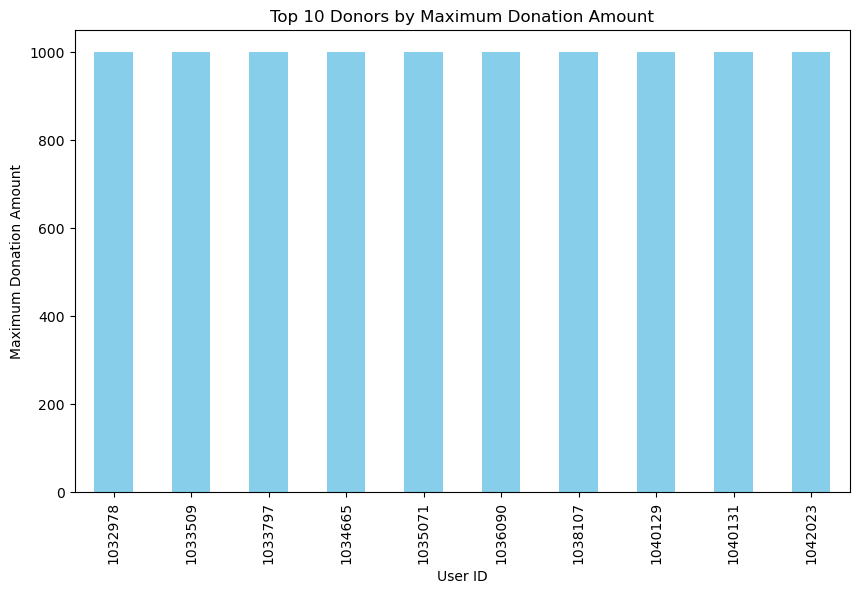

In [19]:
Doners.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Donors by Maximum Donation Amount")
plt.xlabel("User ID")
plt.ylabel("Maximum Donation Amount")
plt.show()

##### Save File New Data 

In [20]:
df.to_csv(r'C:\Users\HP\OneDrive\Desktop\New_IKhair_App.csv')

## Thank You